In [20]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import roc_curve

from tqdm import tqdm
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2D, MaxPooling2D, LSTM, BatchNormalization,Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")


In [32]:
global train_path
train_path = './Dataset/Training'

global test_path
test_path = './Dataset/Testing'


In [34]:


def to_frame(path):
    class_types = []
    class_path = []
    files = os.listdir(path)
    for file in files:
        label_dir = os.path.join(path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_path.append(image_path)
            class_name = os.path.splitext(file)[0]
            class_types.append(class_name)
    
    # Convert to pandas Series
    image_classes = pd.Series(class_types, name='Class')
    image_paths = pd.Series(class_path, name='Class path')
    
    # Concatenate the two Series into a DataFrame
    df = pd.concat([image_paths, image_classes], axis=1)
    
    return df

In [35]:
train_df = to_frame(train_path)

test_df = to_frame(test_path)

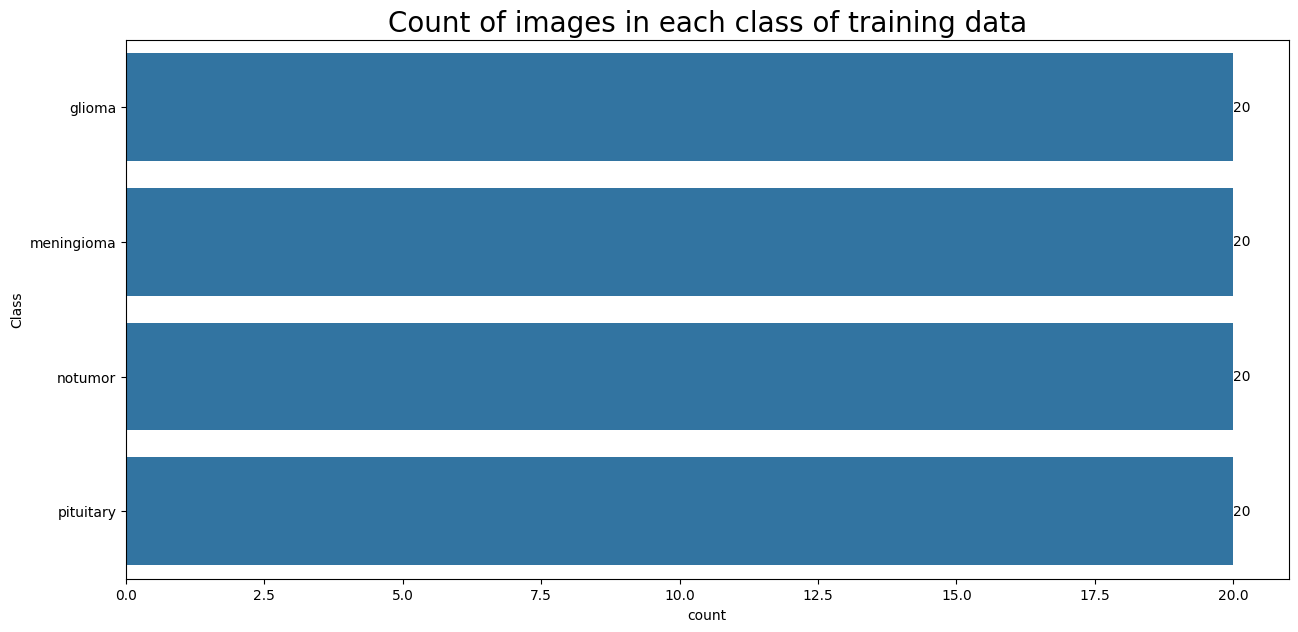

In [38]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=train_df,y=train_df['Class'])
plt.title("Count of images in each class of training data",fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

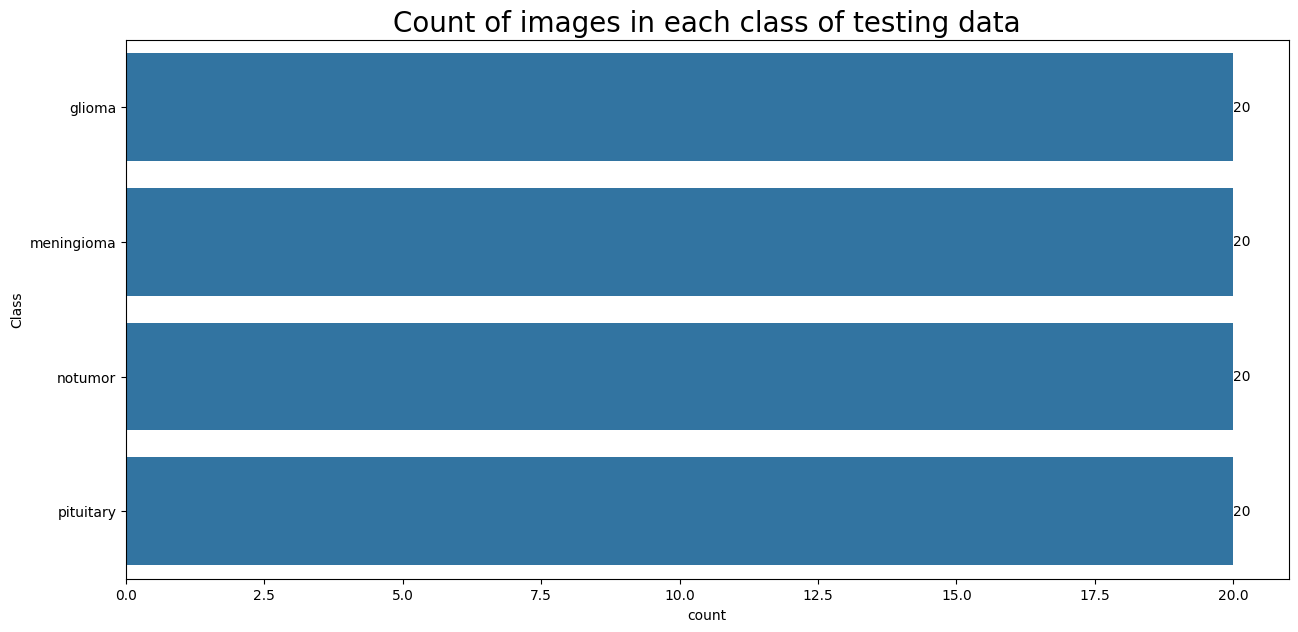

In [39]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=test_df,y=train_df['Class'])
plt.title("Count of images in each class of testing data",fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()